In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.drawing.nx_agraph import to_agraph 
from IPython.display import Image

In [214]:
G = nx.MultiDiGraph()
s1 = "1 (score : 0.9)"
s2 = "2 (score : 0.9)"
s3 = "3 (score : 0.2)"
s4 = "4 (score : 0.4)"
s5 = "5 (score : 0.2)"
nodes = [s1, s2, s3, s4, s5]
G.add_nodes_from([s1,s2,s3,s4,s5])
G.add_edges_from([(s1,s2), (s2,s1), (s1,s3),(s3,s1), (s2,s3),(s3,s2), (s3,s4),(s4,s3)])
G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}
G.nodes[s1]['color'] = 'red'
G.nodes[s2]['color'] = 'red'
G.nodes[s3]['color'] = 'green'
G.nodes[s4]['color'] = 'orange'
G.nodes[s5]['color'] = 'green'

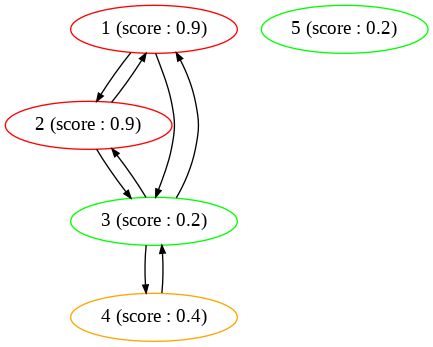

In [215]:
A = to_agraph(G) 
A.layout('dot')                                                                 
Image(A.draw(format='png'))

In [199]:
s = np.array([0.9, 0.9, 0.2, 0.4, 0.2])
se = np.exp(-2*s)
A = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0],
    [1, 1, 1, 1, 1],
])
M = A.dot(np.diag(se))
C = 1/A.dot(se).reshape(5,1).dot(np.ones((1,5)))
P = np.transpose(M*C)
P

array([[0.16514731, 0.16514731, 0.11397983, 0.        , 0.07795033],
       [0.16514731, 0.16514731, 0.11397983, 0.        , 0.07795033],
       [0.66970538, 0.66970538, 0.46221102, 0.59868766, 0.31610418],
       [0.        , 0.        , 0.30982931, 0.40131234, 0.21189097],
       [0.        , 0.        , 0.        , 0.        , 0.31610418]])

array([[0.09160547],
       [0.09160547],
       [0.53824149],
       [0.27854757],
       [0.        ]])

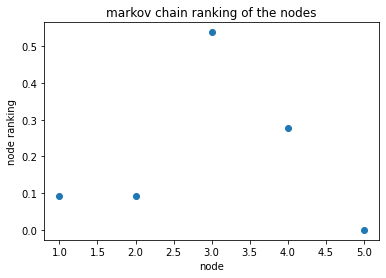

In [217]:
r = np.ones(5)/5
for _ in range(1000):
    r = P.dot(r.reshape(5,1))
plt.scatter([1,2,3,4,5], r)
plt.xlabel("node")
plt.ylabel("node ranking")
plt.title("markov chain ranking of the nodes")
r

In [218]:
G = nx.MultiDiGraph()
s1 = "1 (score : 0.9)"
s2 = "2 (score : 0.9)"
s3 = "3 (score : 0.2)"
s4 = "4 (score : 0.4)"
s5 = "5 (score : 0.2)"
nodes = [s1, s2, s3, s4, s5]
G.add_nodes_from([s1,s2,s3,s4,s5])
G.add_edges_from([(s1,s2), (s2,s1), (s1,s3), (s3,s1), (s2,s3), (s3,s2), (s3,s4), (s4,s3), (s1,s1), (s2,s2), (s3,s3), (s4,s4), (s5,s1), (s5,s2), (s5,s3), (s5,s4), (s5,s5)])
G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}
G[s5][s1][0]['color'] = G[s5][s2][0]['color'] = G[s5][s3][0]['color'] =G[s5][s4][0]['color'] = 'purple'
G[s5][s5][0]['color'] = G[s4][s4][0]['color'] = G[s3][s3][0]['color'] =G[s2][s2][0]['color'] = G[s1][s1][0]['color'] ='blue'
G.nodes[s1]['color'] = 'red'
G.nodes[s2]['color'] = 'red'
G.nodes[s3]['color'] = 'green'
G.nodes[s4]['color'] = 'orange'
G.nodes[s5]['color'] = 'green'
for i in range(5):
    for j in range(5):
        try:
            G[nodes[i]][nodes[j]][0]['label'] = round(P[j,i],2)
        except:
            pass
# G[s1][s2][0]['label'] = 4

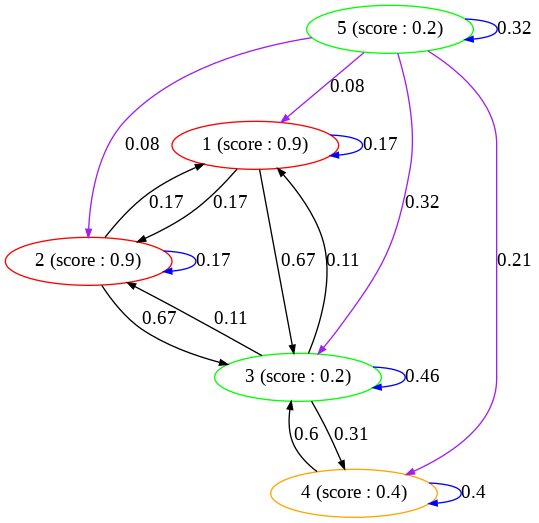

In [219]:
A = to_agraph(G) 
A.layout('dot')                                                                 
labels = nx.get_node_attributes(G, 'score')
Image(A.draw(format='png'))

In [202]:
ns = (s + (np.ones(5) - s).dot(np.diag(r.reshape(1,5)[0]))).reshape(-1, 1)
ns

array([[0.90916055],
       [0.90916055],
       [0.63059319],
       [0.56712854],
       [0.2       ]])

In [210]:
G = nx.MultiDiGraph()
s1 = "1 (score : 0.909)"
s2 = "2 (score : 0.909)"
s3 = "3 (score : 0.63)"
s4 = "4 (score : 0.56)"
s5 = "5 (score : 0.2)"
nodes = [s1, s2, s3, s4, s5]
G.add_nodes_from([s1,s2,s3,s4,s5])
G.add_edges_from([(s1,s2), (s2,s1), (s1,s3),(s3,s1), (s2,s3),(s3,s2), (s3,s4),(s4,s3)])
G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}
G.nodes[s1]['color'] = 'red'
G.nodes[s2]['color'] = 'red'
G.nodes[s3]['color'] = 'green'
G.nodes[s4]['color'] = 'orange'
G.nodes[s5]['color'] = 'green'

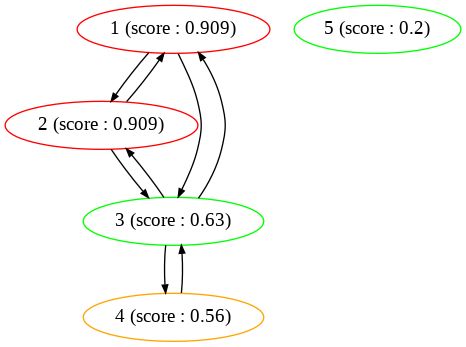

In [211]:
A = to_agraph(G) 
A.layout('dot')                                                                 
labels = nx.get_node_attributes(G, 'score')
Image(A.draw(format='png'))